# Proyek Analisis Data: [Bike Sharing Datasets]
- **Nama:** [Agung Kurniawan]
- **Email:** [koko41701@gmail.com]
- **ID Dicoding:** [koko41701]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca dan suhu terhadap Performa penggunaan Sharing Bike?
- Bagaimana Tren Penggunaan Sharing Bike dalam beberapa bulan terakhir?
- Bagimana perbandingan penggunaan Sharing bike pada holiday vs workingday?

## Import Semua Packages/Library yang Digunakan

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
daily_df = pd.read_csv("data/day.csv")
hourly_df = pd.read_csv(("data/hour.csv"))

**Insight:**
- daily_df merupakan data penggunaan sharing bike dalam basis harian
- hourly_df merupakan data penggunaan sharing bike dalam basis jam

### Assessing Data

#### View Description the summary of the Data

In [40]:
# view the big-picture of the data
daily_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [41]:
hourly_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


#### Check for Missing values and data format

In [42]:
daily_df.info()
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

#### Check for Duplicated Values

In [43]:
# check data duplicates
datasets = [daily_df, hourly_df]
for i in range(len(datasets)):
    data_name = ["daily_df", "hourly_df"]
    print(f"Total duplicated data on {data_name[i]}: {datasets[i].duplicated().sum()}")

Total duplicated data on daily_df: 0
Total duplicated data on hourly_df: 0


**Insight:**
- invalid object format untuk **dteday**: seharusnya menggunakan format datetime
- data penunjuk waktu kebanyakan dikodifikasi dalam angka integer (e.g. season:"springer" -> 1 ) sehingga sulit dimengerti
- data temperatur, kelembepan, dan kecepatan udara menggunakan nilai yang dinormalisasi bukan nilali sebenarnya

### Cleaning Data

In [44]:
# change the invalid format from object to datetime
for data in datasets:
    data["dteday"] = pd.to_datetime(data["dteday"])

    # Create new column hr_formated for proper 24 hour format HH:MM
    if "hr" in data.columns:
        data["hr_formated"] = data["hr"].apply(lambda hour: f"{hour:02d}:00")

#### Merubah data penunjuk waktu dengan nilai sebenarnya

In [45]:
# Confirming the conventions of weekday from the datasets
daily_df[["dteday", "weekday"]].drop_duplicates().sort_values("dteday").head(10)

,dteday,weekday
0,2011-01-01,6
1,2011-01-02,0
2,2011-01-03,1
3,2011-01-04,2
4,2011-01-05,3
5,2011-01-06,4
6,2011-01-07,5
7,2011-01-08,6
8,2011-01-09,0
9,2011-01-10,1


In [46]:
# replace numeric codifications with actual values
columns_to_replace = ["season", "yr", "mnth", "weekday", "weathersit"]
seasons = ["Spring", "Summer", "Fall", "Winter"]
years = ["2011", "2012"]
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
weekdays = [
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursdady",
    "Friday",
    "Saturday",
]
weathersit = ["Clear", "Mist/Cloudy", "Light Rain/Snow", "Heavy Rain/Snow"]

for data in datasets:
    for column in columns_to_replace:
        if column == "season":
            data[column] = data[column].replace(
                {1: seasons[0], 2: seasons[1], 3: seasons[2], 4: seasons[3]}
            )
        if column == "yr":
            data[column] = data[column].replace({0: years[0], 1: years[1]})
        if column == "mnth":
            data[column] = data[column].replace(
                {
                    1: months[0],
                    2: months[1],
                    3: months[2],
                    4: months[3],
                    5: months[4],
                    6: months[5],
                    7: months[6],
                    8: months[7],
                    9: months[8],
                    10: months[9],
                    11: months[10],
                    12: months[11],
                }
            )
        if column == "weekday":
            data[column] = data[column].replace(
                {
                    0: weekdays[0],
                    1: weekdays[1],
                    2: weekdays[2],
                    3: weekdays[3],
                    4: weekdays[4],
                    5: weekdays[5],
                    6: weekdays[6],
                }
            )
        if column == "weathersit":
            data[column] = data[column].replace(
                {
                    1: weathersit[0],
                    2: weathersit[1],
                    3: weathersit[2],
                    4: weathersit[3],
                }
            )

In [47]:
# change the holiday and workingday columns as boolean
for data in datasets:
    data["holiday"] = data["holiday"].astype(bool)
    data["workingday"] = data["workingday"].astype(bool)

#### Mengembalikan Temp, Atemp, Hum, Windspeed ke Nilai sebenarnya

In [48]:
normalized_columns = ["temp", "atemp", "hum", "windspeed"]
for data in datasets:
    for column in normalized_columns:
        if column == "temp":
            data[column] = data[column] * 41
        if column == "atemp":
            data[column] = data[column] * 50
        if column == "hum":
            data[column] = data[column] * 100
        if column == "windspeed":
            data[column] = data[column] * 67

#### Validate the replacements

In [49]:
# validate the cleaning results
for data in datasets:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

In [50]:
daily_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,False,Saturday,True,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [51]:
hourly_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_formated
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,Fall,2012,July,NaN,False,Saturday,True,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16:00
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


**Insight:**
- **dteday** diubah ke **datetime64** format
- data yang merepresentasikan waktu diubah dengan nilai string sebenarnya
- data temp, humidity, dan windspeed dikembalikan ke nilai aslinya
- tidak ada **missing** value atau **duplicated** value dalam the datasets

## Exploratory Data Analysis (EDA)

### Create Merged DataFrame from Daily and Hourly data

In [52]:
merged_df = pd.merge(
    left=hourly_df,
    right=daily_df,
    how="left",
    left_on="dteday",
    right_on="dteday",
)
merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Spring,2011,January,0,False,Saturday,False,Clear,...,Saturday,False,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-01,Spring,2011,January,1,False,Saturday,False,Clear,...,Saturday,False,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2,3,2011-01-01,Spring,2011,January,2,False,Saturday,False,Clear,...,Saturday,False,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
3,4,2011-01-01,Spring,2011,January,3,False,Saturday,False,Clear,...,Saturday,False,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
4,5,2011-01-01,Spring,2011,January,4,False,Saturday,False,Clear,...,Saturday,False,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985


### Pengaruh Suhu dan Cuaca Terhadap Penggunaan Sharing Bike

In [53]:
# Clustering
bins = [0, 13, 21, 27, 42]
labels = ["dingin", "Sejuk", "Hangat", "Panas"]

merged_df["temp_category"] = pd.cut(
    merged_df["temp_y"], bins=bins, labels=labels, right=False
)

In [54]:
weathersit_pivot_df = (
    merged_df.groupby(by=["weathersit_y", "temp_category"])
    .agg({"casual_y": ["mean"], "registered_y": ["mean"], "cnt_y": ["mean"]})
)
weathersit_pivot_df.columns = [
    "casual_daily",
    "registered_daily",
    "cnt_daily",
]

weathersit_pivot_df

/tmp/ipykernel_2036106/1529058920.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(by=["weathersit_y", "temp_category"])


casual_daily  registered_daily    cnt_daily
weathersit_y    temp_category                                             
Clear           dingin           261.809609       2426.395599  2688.205209
                Sejuk            874.942765       3721.457235  4596.400000
                Hangat          1344.154295       4913.507089  6257.661384
                Panas           1258.887443       4415.982753  5674.870197
Light Rain/Snow dingin            98.500000       1028.500000  1127.000000
                Sejuk            112.240838       1380.785340  1493.026178
                Hangat           363.569697       2573.933333  2937.503030
                Panas                   NaN               NaN          NaN
Mist/Cloudy     dingin           222.656729       1955.287905  2177.944634
                Sejuk            518.521073       3123.751916  3642.272989
                Hangat           914.063728       4261.038118  5175.101846
                Panas           1277.741935       4099.941935  5377.683871

### Total Penggunaan Sharing Bike Beberapa bulan Terakhir (2012)

In [55]:
year = "2012"
yearly_df = merged_df[merged_df["yr_y"] == year]
daily_usage_df = (
    yearly_df.groupby(by=["mnth_y"])
    .agg({"registered_y": "mean", "casual_y": "mean", "cnt_y": "mean"})
    .reset_index()
)
daily_usage_df.columns = [
    "months",
    "registered_counts",
    "casual_counts",
    "total_counts",
]

daily_usage_df["months"] = pd.Categorical(
    daily_usage_df["months"], months, ordered=True
)

daily_usage_df.sort_values(by="months", ascending=False)

,months,registered_counts,casual_counts,total_counts
2,December,3571.311321,427.582210,3998.893531
9,November,4386.720056,701.438719,5088.158774
10,October,5550.416667,1169.117232,6719.533898
11,September,5826.500000,1459.266667,7285.766667
1,August,5526.000000,1393.451613,6919.451613
5,July,5222.645161,1345.322581,6567.967742
6,June,5317.866667,1443.133333,6761.000000
8,May,4891.290323,1426.935484,6318.225806
0,April,4525.520891,1283.083565,5808.604457
7,March,4300.020188,1019.076716,5319.096904


### Penggunaan waktu holiday vs workingday

In [56]:
usage_comparison_df = (
    merged_df.groupby(by=["workingday_y"])
    .agg({"casual_y": "mean", "registered_y": "mean", "cnt_y": "mean"})
    .reset_index()
)
usage_comparison_df.columns = ["day_type", "Casual", "Registered", "Total"]

usage_comparison_df["day_type"] = usage_comparison_df["day_type"].replace(
    {False: "Holiday", True: "Working Day"}
)

usage_comparison_df

,day_type,Casual,Registered,Total
0,Holiday,1375.189518,2966.644541,4341.834059
1,Working Day,612.286136,4010.569069,4622.855204


**Insight:**
- Secara umum penggunaan sharing bike pada cuaca dingin dan ekstrem menurun. dan sharing bike paling banyak digunakan pada cuaca cerah
- Pada tahun 2012 penggunaan sharing bike menurun selama 4 bulan terakhir yaitu pada bulan september hingga desember
- Secara umum penggunaan sharing bike lebih banyak ketika working day, namun pengguna casual lebih banyak pada hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan suhu terhadap Performa penggunaan Sharing Bike?

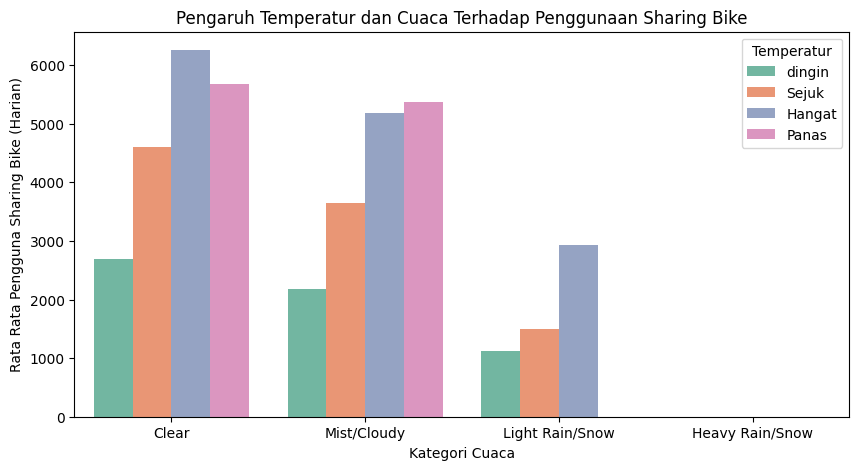

In [57]:
weathersit_plot_df = weathersit_pivot_df.reset_index()
weathersit_plot_df.columns = [
    "weathersit_daily",
    "temp_category",
    "casual_daily",
    "registered_daily",
    "cnt_daily",
]
weathersit_plot_df["weathersit_daily"] = pd.Categorical(
    weathersit_plot_df["weathersit_daily"], weathersit
)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=weathersit_plot_df,
    x="weathersit_daily",
    y="cnt_daily",
    hue="temp_category",
    palette="Set2",
)
plt.xlabel("Kategori Cuaca")
plt.ylabel("Rata Rata Pengguna Sharing Bike (Harian)")
plt.title("Pengaruh Temperatur dan Cuaca Terhadap Penggunaan Sharing Bike")
plt.legend(title="Temperatur")
plt.show()

### Pertanyaan 2: Bagaimana Tren Penggunaan Sharing Bike dalam beberapa bulan terakhir?

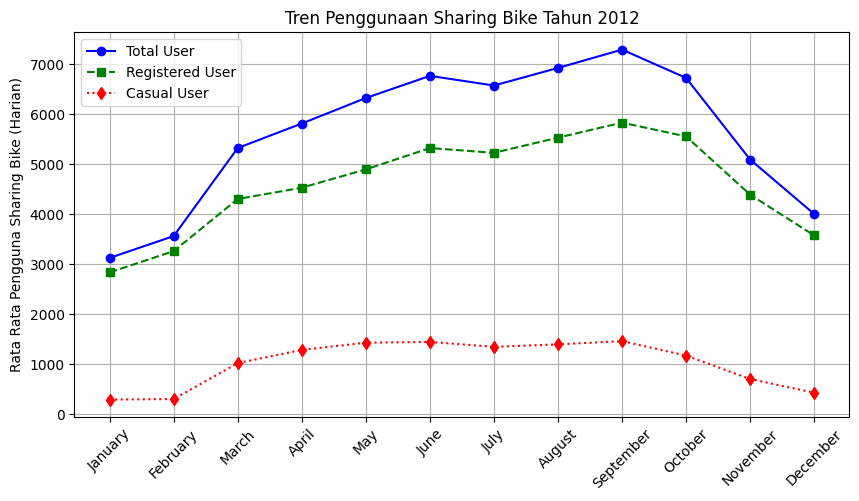

In [58]:
daily_usage_plot = daily_usage_df.sort_values(by="months", ascending=True)
plt.figure(figsize=(10, 5))

plt.plot(
    daily_usage_plot["months"],
    daily_usage_plot["total_counts"],
    marker="o",
    linestyle="-",
    color="b",
    label="Total User",
)
plt.plot(
    daily_usage_plot["months"],
    daily_usage_plot["registered_counts"],
    marker="s",
    linestyle="--",
    color="g",
    label="Registered User",
)
plt.plot(
    daily_usage_plot["months"],
    daily_usage_plot["casual_counts"],
    marker="d",
    linestyle=":",
    color="r",
    label="Casual User",
)
plt.xticks(rotation=45)
plt.ylabel("Rata Rata Pengguna Sharing Bike (Harian)")
plt.title("Tren Penggunaan Sharing Bike Tahun 2012")
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagimana perbandingan penggunaan Sharing bike saat holiday vs workingday?

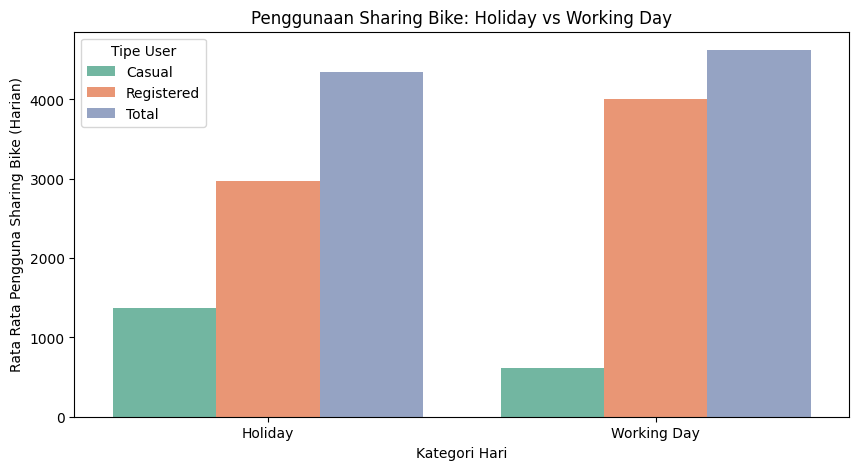

In [59]:
usage_comparison_melt_df = usage_comparison_df.melt(
    id_vars=["day_type"], var_name="user_type", value_name="user_counts"
)
plt.figure(figsize=(10, 5))

sns.barplot(
    data=usage_comparison_melt_df,
    x="day_type",
    y="user_counts",
    hue="user_type",
    palette="Set2",
)
plt.xlabel("Kategori Hari")
plt.ylabel("Rata Rata Pengguna Sharing Bike (Harian)")
plt.title("Penggunaan Sharing Bike: Holiday vs Working Day")
plt.legend(title="Tipe User")
plt.show()

**Insight:**
- Pengguna sharing bike menurun pada cuaca dingin dan ekstrem
- Terdapat Penurunan tren penggunaan sharing bike pada tahun 2012 dari bulan September hingga desember
- Pengguna sharing bike casual meningkat pada hari libur

## Conclusion

- Kesimpulan pertanyaan 1:
    - Bahwa penggunaan sharing bike bergantung pada kondisi cuaca, sehingga suplai atau ketersedian sharing bike bisa dikurangi selama kondisi cuaca ekstrem untuk memotong biaya operasinal ataupun produksi
- Kesimpulan pertanyaan 2:
    - Bahwa dari tahun 2012 terjadi penurunan penggunaan sharing bike dari bulan September Hingga desember, hal tsb dikarenakan pada bulan bersangkutan temperatur menurun karena menuju musim dingin (winter)
- Kesimpulan pertanyaan 3:
    - Bahwa pengguna casual sharing bike pada hari libur meningkat, hal tersebut dapat dimanfaatkan untuk menggaet pasar casual user untuk menjadi registered user dengan cara membuat event atau promo pada hari libur

## Output Merged data to CSV

In [60]:
merged_df.to_csv("dashboard/main_data.csv", index=False)